In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [2]:
df = pd.read_excel("Student-Employability-Datasets.xlsx")
df.shape

(2982, 10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2982 entries, 0 to 2981
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Name of Student             2982 non-null   object
 1   GENERAL APPEARANCE          2982 non-null   int64 
 2   MANNER OF SPEAKING          2982 non-null   int64 
 3   PHYSICAL CONDITION          2982 non-null   int64 
 4   MENTAL ALERTNESS            2982 non-null   int64 
 5   SELF-CONFIDENCE             2982 non-null   int64 
 6   ABILITY TO PRESENT IDEAS    2982 non-null   int64 
 7   COMMUNICATION SKILLS        2982 non-null   int64 
 8   Student Performance Rating  2982 non-null   int64 
 9   CLASS                       2982 non-null   object
dtypes: int64(8), object(2)
memory usage: 233.1+ KB


In [4]:
df.head()

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,Student 1,4,5,4,5,5,5,5,5,Employable
1,Student 2,4,4,4,4,4,4,3,5,Employable
2,Student 3,4,3,3,3,3,3,2,5,LessEmployable
3,Student 4,3,3,3,2,3,3,3,5,LessEmployable
4,Student 5,4,4,3,3,4,4,3,5,Employable


In [5]:
new_df = df.drop(
    columns = [
        'CLASS',
        'Name of Student',
        'Student Performance Rating'
    ]
)

total = pd.DataFrame({
    'Skills' : new_df.columns,
    'Total Value' : new_df.sum()
})

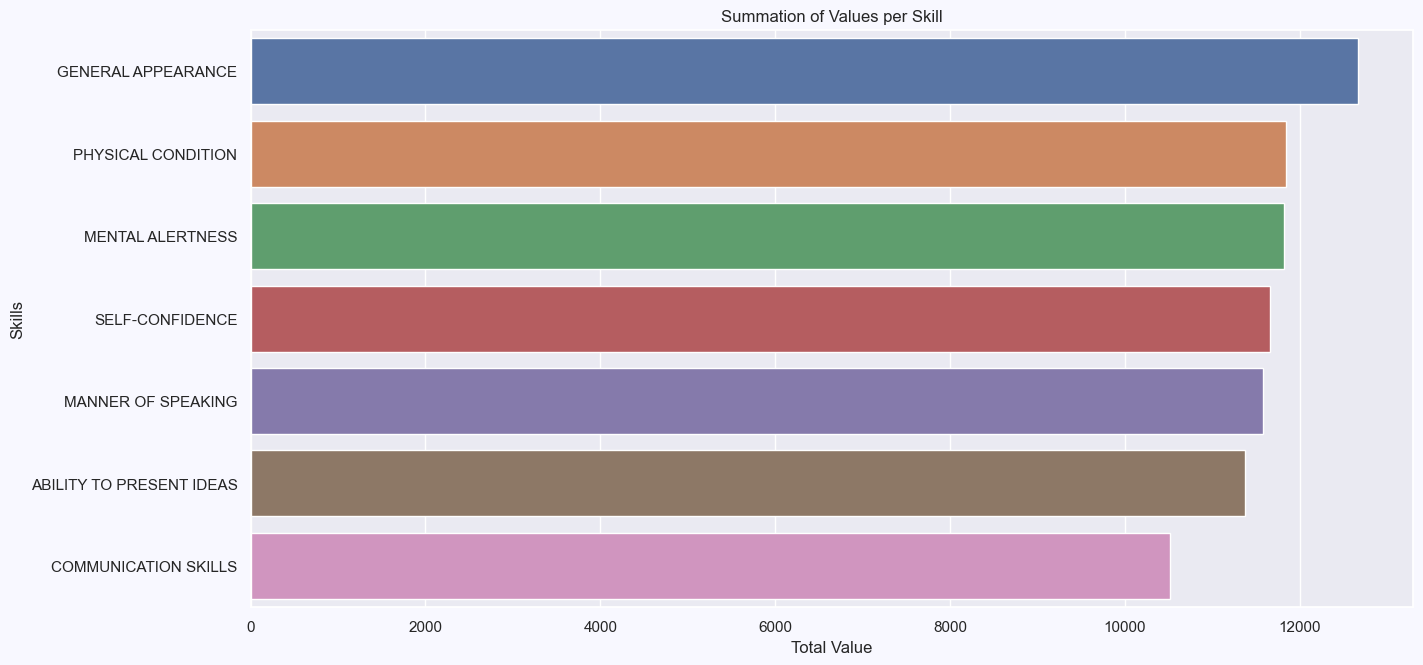

In [6]:
fig = plt.figure(figsize=(15,7.5))
fig.patch.set_facecolor('ghostwhite')

sns.set_theme(style="darkgrid", palette="deep")

ax = sns.barplot(
    y = 'Skills',
    x='Total Value',
    data = total.sort_values(
        'Total Value',
        ascending = False
    )
)

plt.title('Summation of Values per Skill')
plt.show()

Filipino Students are lacking of communicating skills but has the best general appearance

In [7]:
df_employed = df.loc[df['CLASS'] == 'Employable']

df_employed = df_employed.drop(columns = ['Name of Student','CLASS'])

ave_skills = pd.DataFrame({
    'Average Score' : df_employed.mean()
})

ave_skills

,Average Score
GENERAL APPEARANCE,4.314054
MANNER OF SPEAKING,4.012146
PHYSICAL CONDITION,4.076345
MENTAL ALERTNESS,4.097744
SELF-CONFIDENCE,4.008097
ABILITY TO PRESENT IDEAS,3.887796
COMMUNICATION SKILLS,3.609601
Student Performance Rating,4.610179


In [8]:
df_employed.head()

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating
0,4,5,4,5,5,5,5,5
1,4,4,4,4,4,4,3,5
4,4,4,3,3,4,4,3,5
5,4,4,3,3,3,3,3,5
6,4,4,4,3,3,3,3,3


In [9]:
pie_data = ave_skills.drop(index = ['Student Performance Rating'], axis = 0)
pie_data

,Average Score
GENERAL APPEARANCE,4.314054
MANNER OF SPEAKING,4.012146
PHYSICAL CONDITION,4.076345
MENTAL ALERTNESS,4.097744
SELF-CONFIDENCE,4.008097
ABILITY TO PRESENT IDEAS,3.887796
COMMUNICATION SKILLS,3.609601


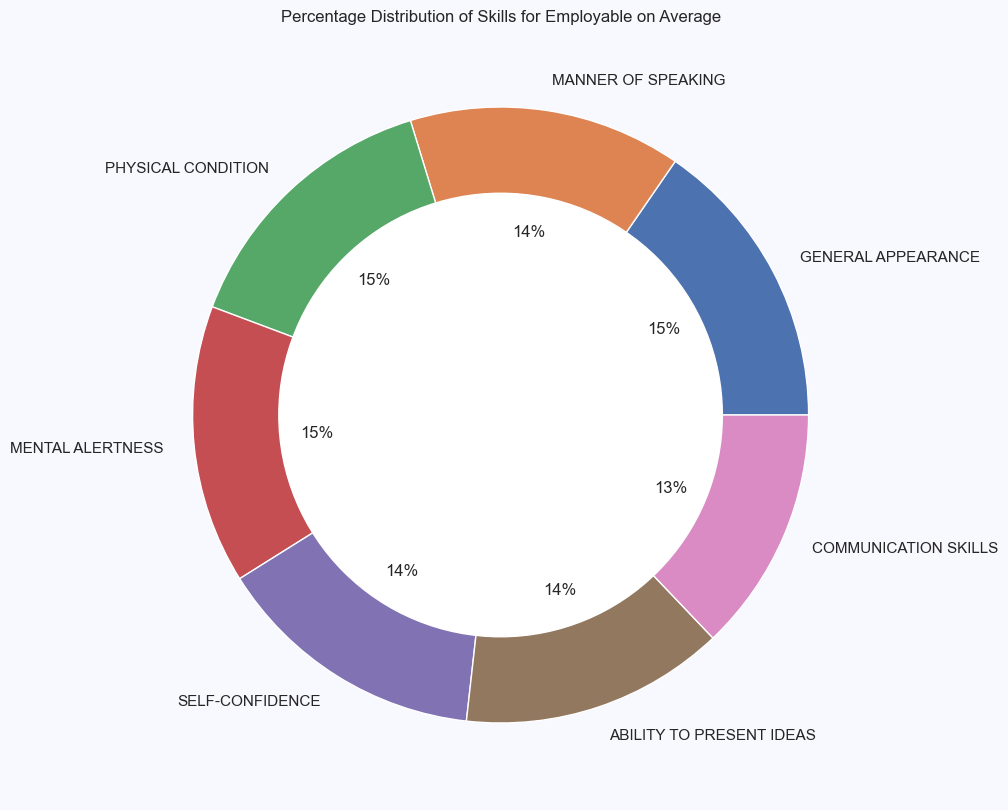

In [10]:
palette_color = sns.color_palette(palette = 'deep')

fig = plt.figure(figsize=(20,10))
fig.patch.set_facecolor('ghostwhite')
  
plt.pie(
    pie_data['Average Score'],
    labels = pie_data.index,
    colors = palette_color,
    autopct = '%.0f%%'
)

centre_circle = plt.Circle((0, 0), 0.72, fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Percentage Distribution of Skills for Employable on Average')
plt.show()

Analyzing the Distribution of the Skills for Employable Students, We can see that these Skills are almost evenly distributed.

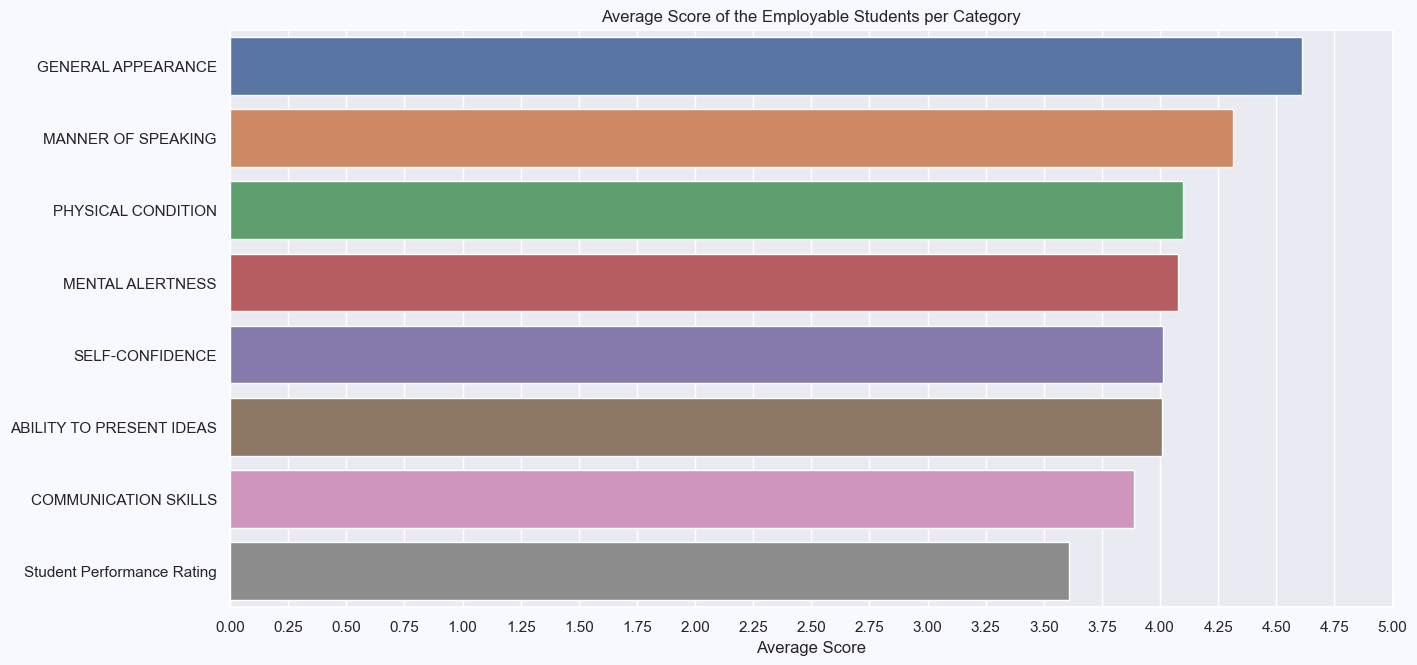

In [11]:
fig = plt.figure(figsize=(15,7.5))
fig.patch.set_facecolor('ghostwhite')

sns.set_theme(style="darkgrid", palette="deep")

sns.barplot(
    y = ave_skills.index,
    x= 'Average Score',
    data = ave_skills.sort_values(
        'Average Score',
        ascending = False
    )
)

plt.xticks(np.arange(0,5.25,0.25))
plt.title('Average Score of the Employable Students per Category')
plt.show()

We can see that the mean scores for employable students are capable of reaching a mark of 4 and above for most of the skills

In [12]:
df_ave = pd.DataFrame({
    'Student' : df['Name of Student'].loc[df['CLASS'] == 'Employable'],
    'Average Score': df.loc[df['CLASS'] == 'Employable']\
    ._get_numeric_data().mean(axis = 1)
})

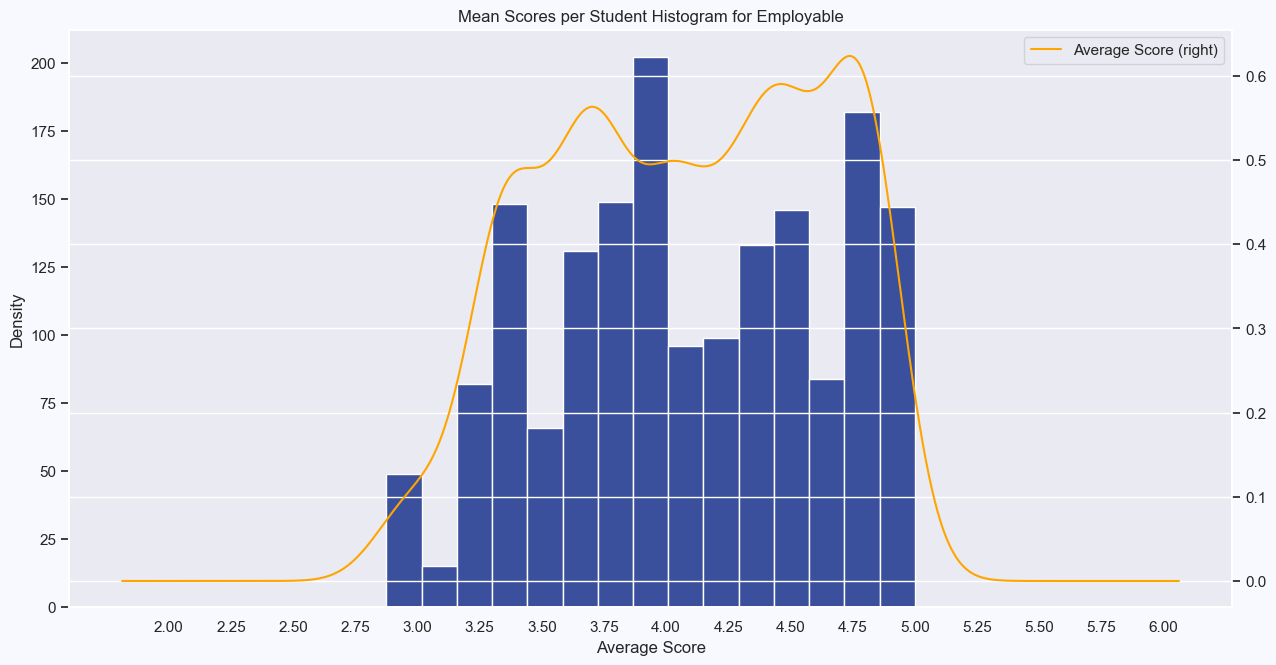

In [13]:
fig = plt.figure(figsize=(15,7.5))
fig.patch.set_facecolor('ghostwhite')

sns.set_theme(style='darkgrid', palette = 'dark')

ax = sns.histplot(
    x = 'Average Score',
    data = df_ave
)

df_ave.plot(
    kind='kde',
    ax=ax,
    secondary_y=True,
    color = 'orange'
)

plt.xticks(np.arange(2,6.25,0.25))
plt.title('Mean Scores per Student Histogram for Employable')
plt.show()

The Histogram shows that the minimum scores for the Employable can be at least 3.0 But how about the Less Employable?

In [14]:
df_less = df.loc[df['CLASS'] == 'LessEmployable']\
.drop(columns = ['CLASS', 'Name of Student'])

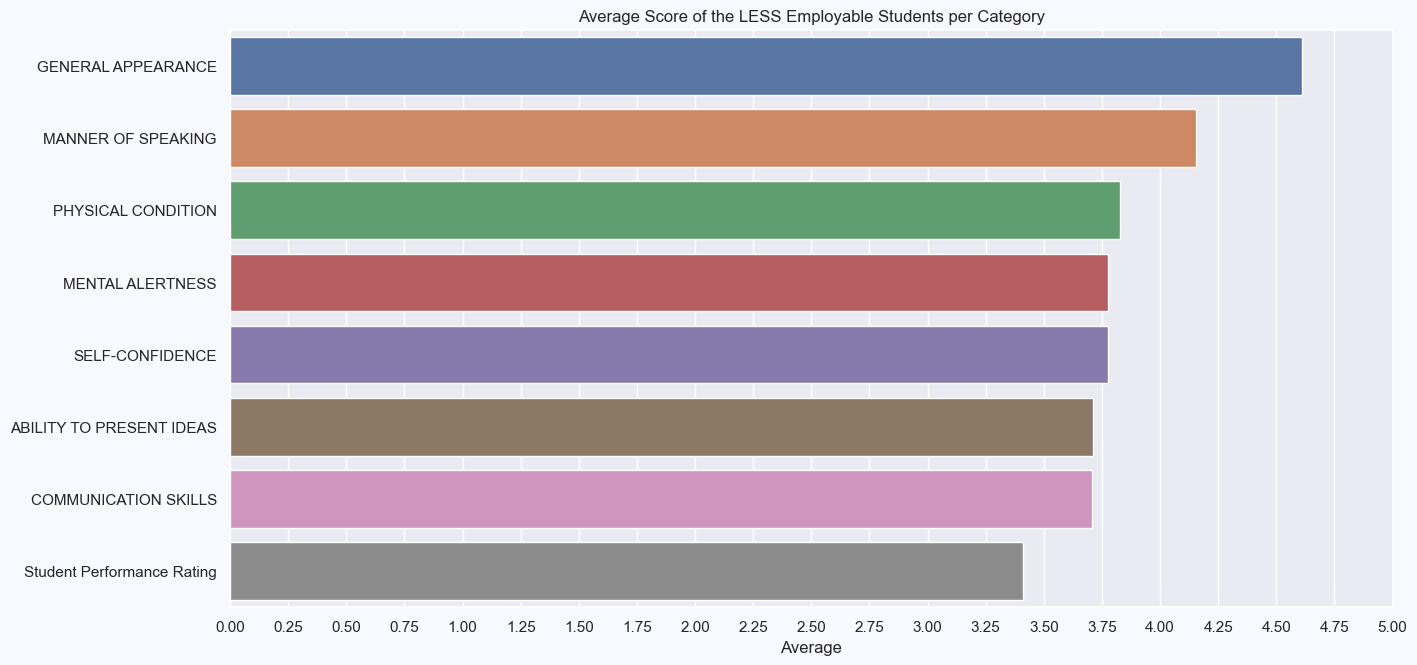

In [15]:
fig = plt.figure(figsize=(15,7.5))
fig.patch.set_facecolor('ghostwhite')

less_ave_skills = pd.DataFrame({
    'Average' : df_less.mean()
})

sns.set_theme(style="darkgrid", palette="deep")

sns.barplot(
    y = less_ave_skills.index,
    x= 'Average',
    data = less_ave_skills.sort_values(
        'Average',
        ascending = False
    )
)

plt.xticks(np.arange(0,5.25,0.25))
plt.title('Average Score of the LESS Employable Students per Category')
plt.show()

Comparing this to the Employable most of the Categories in Less Employable failed to reach an average score of 4, except for general appearance. Whereas in Employable, 5 categories were able to reach an average score of 4.

In both charts we can see that Filipino Students are lacking of Communication skills, but is excelling at General Appearance

In [16]:
df_ave_less = pd.DataFrame({
    'Student' : df['Name of Student'].loc[
        df['CLASS'] == 'LessEmployable'
    ],
    'Average Score': df.loc[
        df['CLASS'] == 'LessEmployable'
    ]._get_numeric_data().mean(axis = 1)
})

df_ave_less.head()

,Student,Average Score
2,Student 3,3.250
3,Student 4,3.125
10,Student 11,4.875
12,Student 13,3.125
13,Student 14,2.875


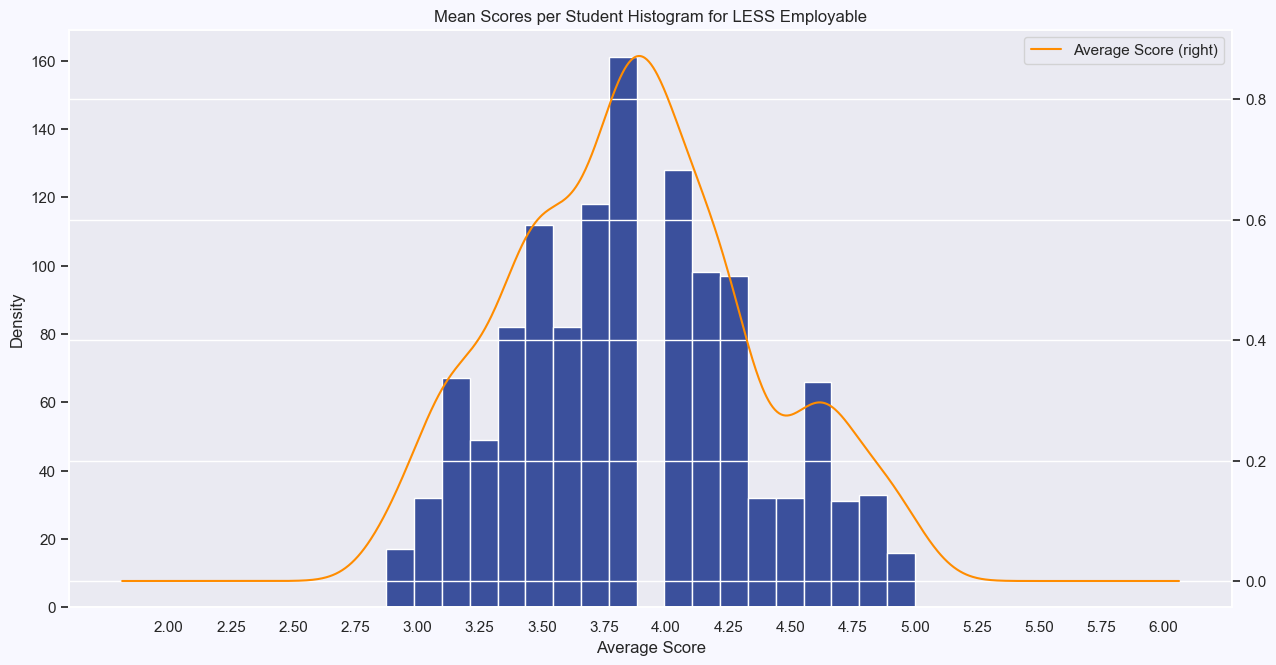

In [17]:
fig = plt.figure(figsize=(15,7.5))
fig.patch.set_facecolor('ghostwhite')

sns.set_theme(style='darkgrid', palette = 'dark')

ax = sns.histplot(
    x = 'Average Score',
    data = df_ave_less
)

df_ave_less.plot(
    kind='kde',
    ax=ax,
    secondary_y=True,
    color = 'darkorange'
)

plt.xticks(np.arange(2,6.25,0.25))
plt.title('Mean Scores per Student Histogram for LESS Employable')
plt.show()

Surprisingly, Less Employable Students can also reach an average score of 4 and higher. Lets see where they are lacking.

In [18]:
print('LESS EMPLOYABLE STUDENTS')
df_less.loc[df_ave_less['Average Score'] > 3.5].head(10)

LESS EMPLOYABLE STUDENTS


,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating
10,5,5,5,5,5,5,4,5
14,4,4,3,4,4,4,3,5
17,4,4,4,4,4,4,4,5
18,4,4,4,5,5,4,4,5
19,4,3,3,4,5,4,3,5
30,4,3,4,4,3,4,3,5
32,5,5,4,5,5,4,4,5
33,4,4,4,5,5,4,3,5
43,4,3,4,3,4,3,3,5
44,5,4,5,5,4,4,4,5


In [19]:
print('EMPLOYABLE STUDENTS')
df_employed.loc[df_ave['Average Score'] > 3.5].head(10)

EMPLOYABLE STUDENTS


,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating
0,4,5,4,5,5,5,5,5
1,4,4,4,4,4,4,3,5
4,4,4,3,3,4,4,3,5
7,5,3,3,4,3,3,3,5
8,4,4,4,4,4,4,4,5
9,4,4,3,4,3,4,4,5
11,3,4,4,4,3,4,4,5
20,5,4,5,4,4,4,4,5
21,5,4,4,4,4,4,4,3
22,5,4,5,5,5,5,4,5


It seems that in the data shown, the average score isn't a guarantee to be classified as employable or less employable. This shows that it is possible to be Less Employabe even if you can reach an average score higher than 4.


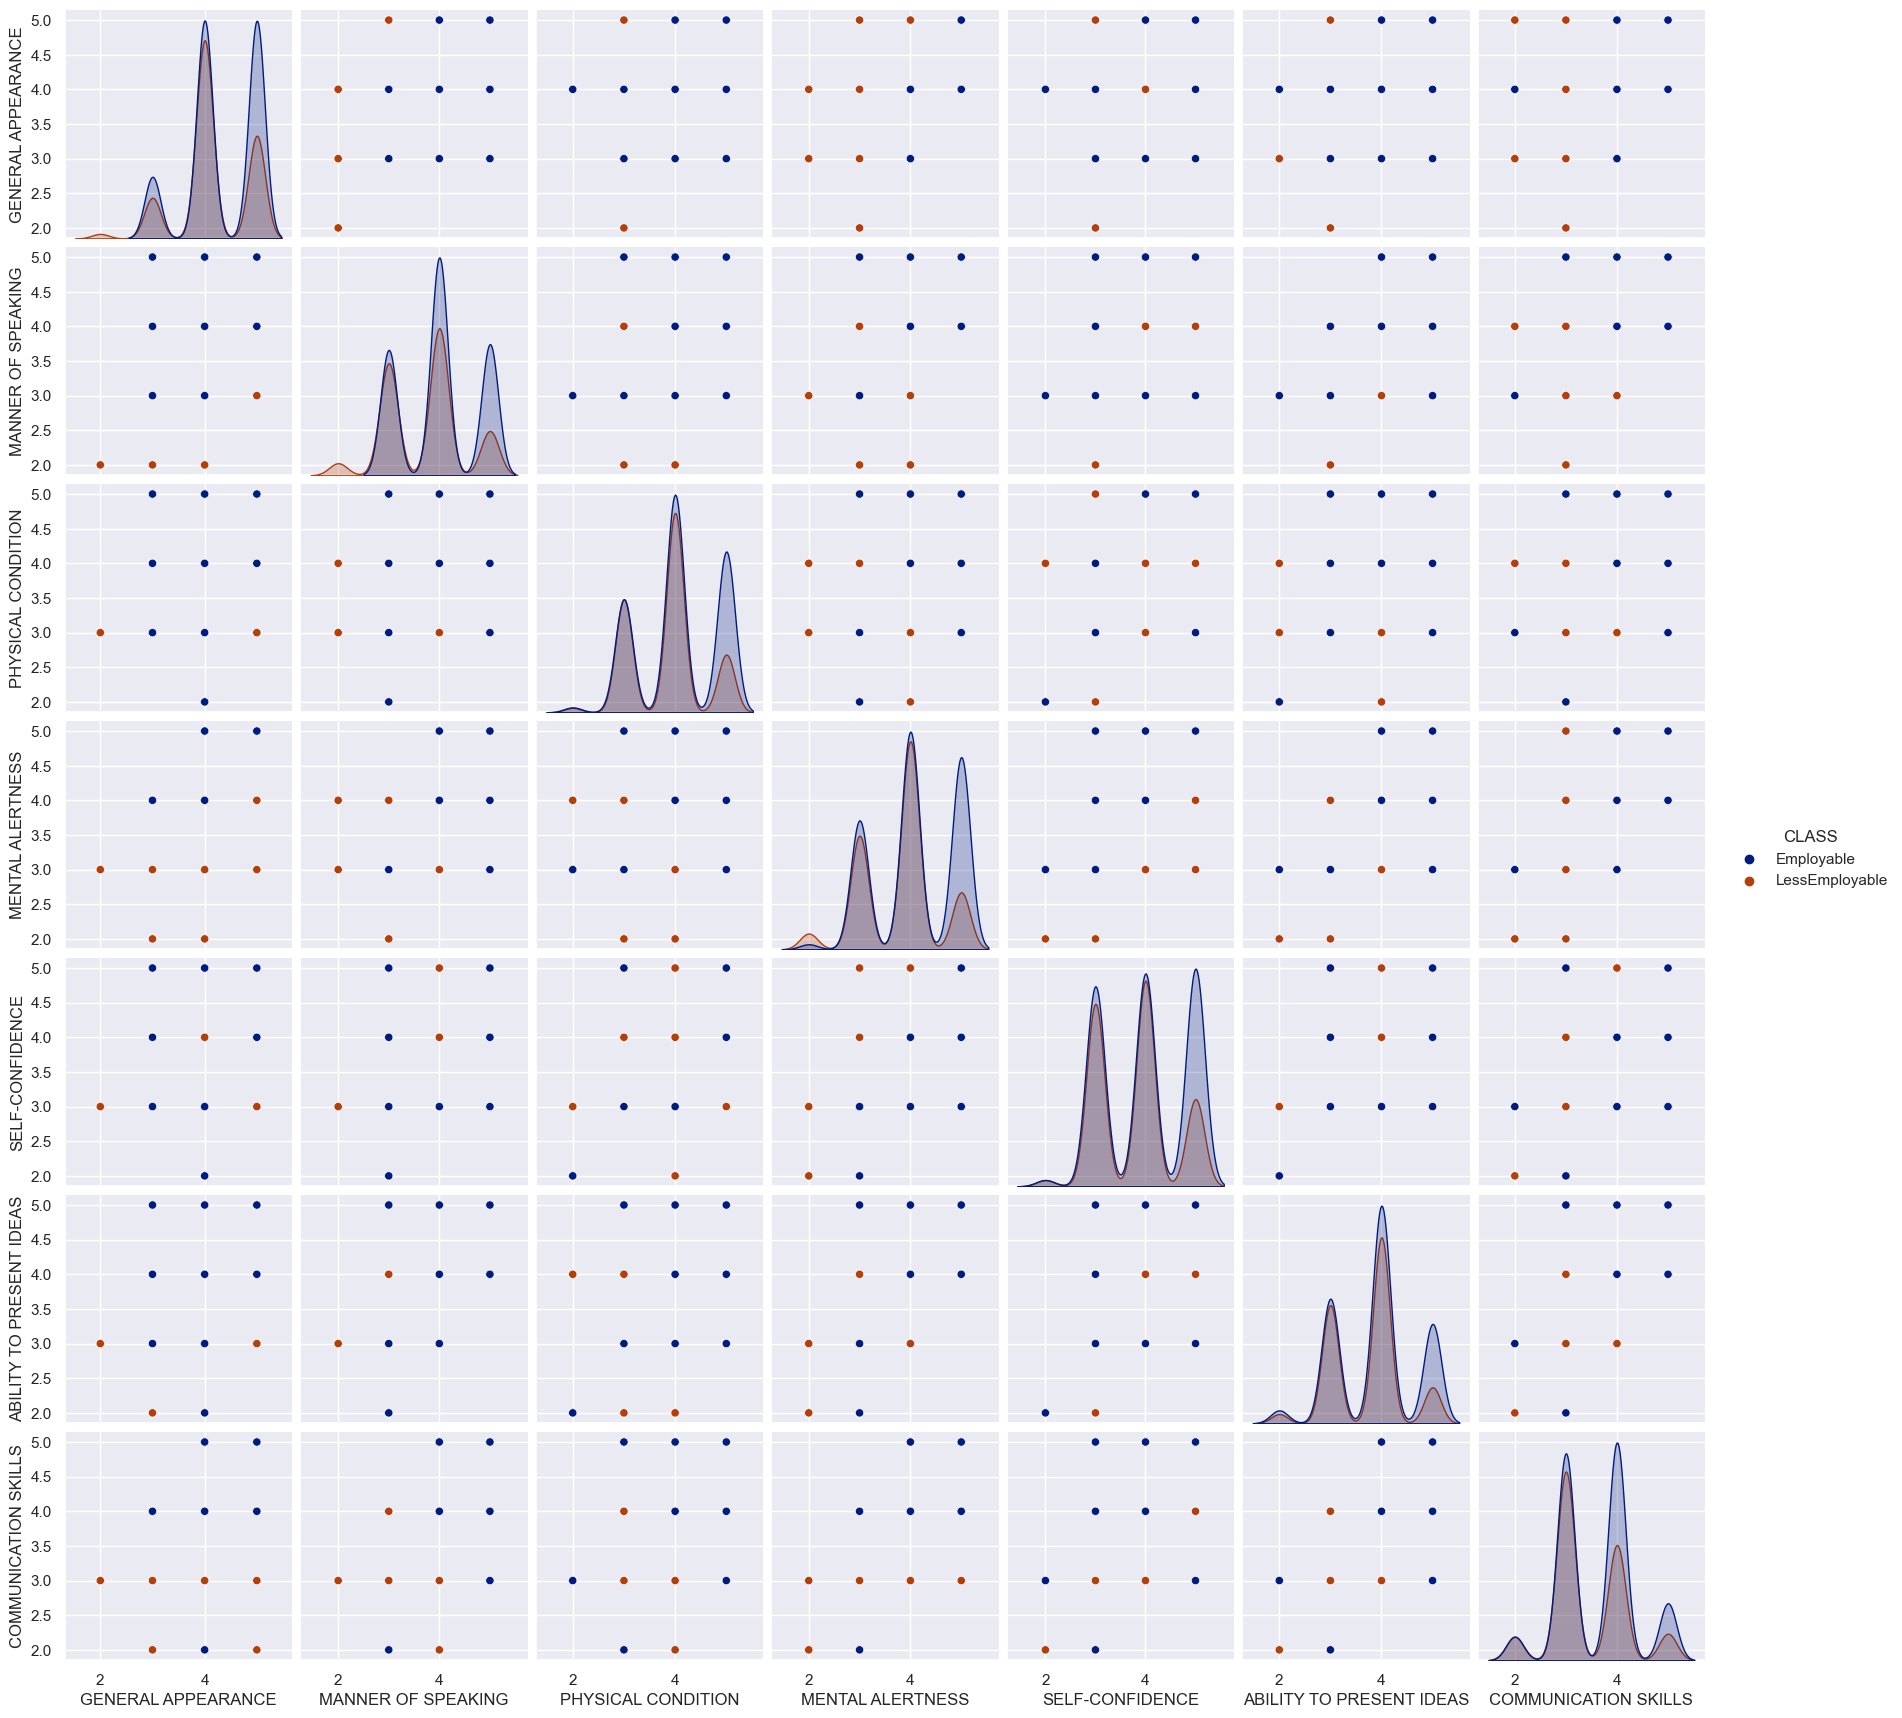

In [20]:
sns.pairplot(
    vars = [
        'GENERAL APPEARANCE',
        'MANNER OF SPEAKING',
        'PHYSICAL CONDITION',
        'MENTAL ALERTNESS',
        'SELF-CONFIDENCE',
        'ABILITY TO PRESENT IDEAS',
        'COMMUNICATION SKILLS'
    ],
    hue = 'CLASS', 
    kind = 'scatter',
    data = df
)

plt.show()

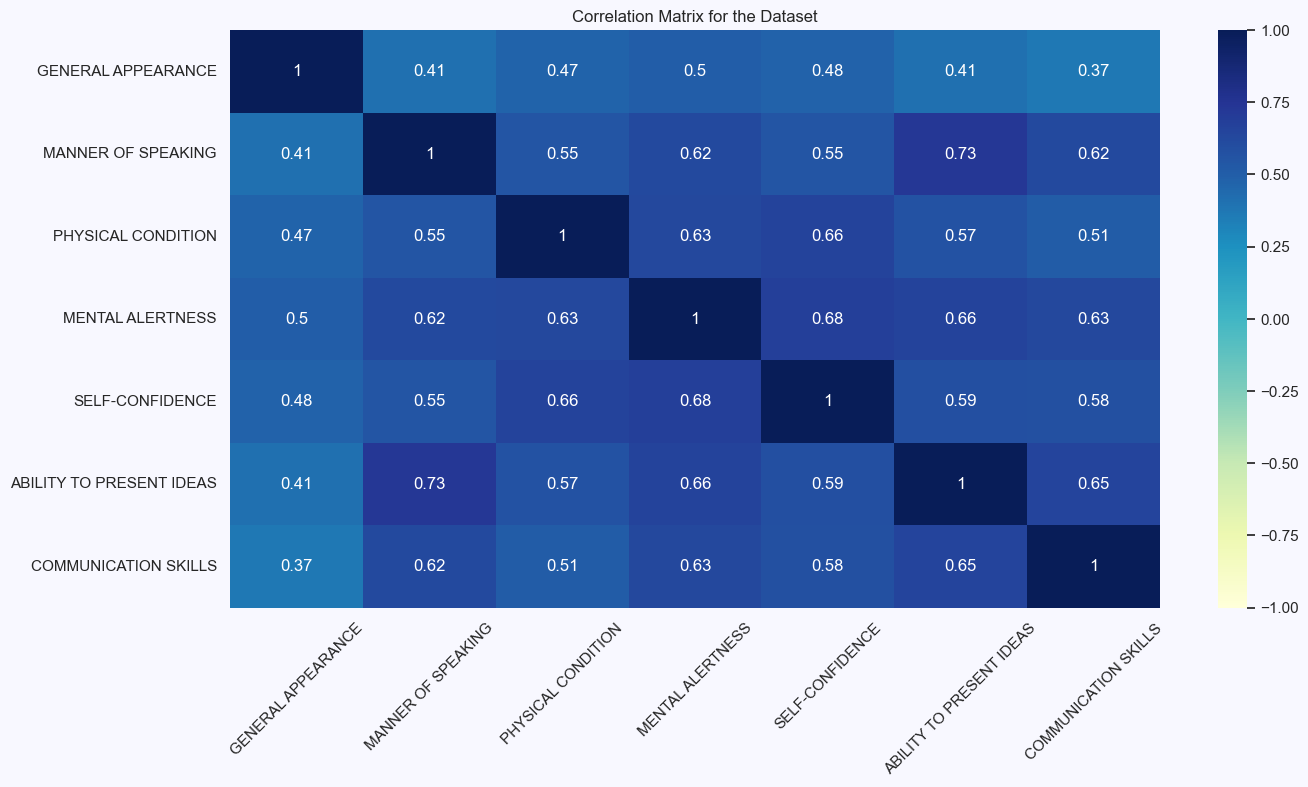

In [21]:
fig = plt.figure(figsize=(15,7.5))
fig.patch.set_facecolor('ghostwhite')

ax = sns.heatmap(
    df.drop(
        columns = [
            'Name of Student',
            'CLASS',
            'Student Performance Rating'
        ]
    ).corr().round(2),
    annot=True,
    vmin = -1,
    vmax = 1,
    center = 0,
    cmap ='YlGnBu'
)

plt.xticks(rotation = 45)
plt.title("Correlation Matrix for the Dataset")
plt.show()

We can see that there is a strong correlation between Manner of Speaking and The Ability to present ideas with an R of 0.73 and R-square of 0.53. 

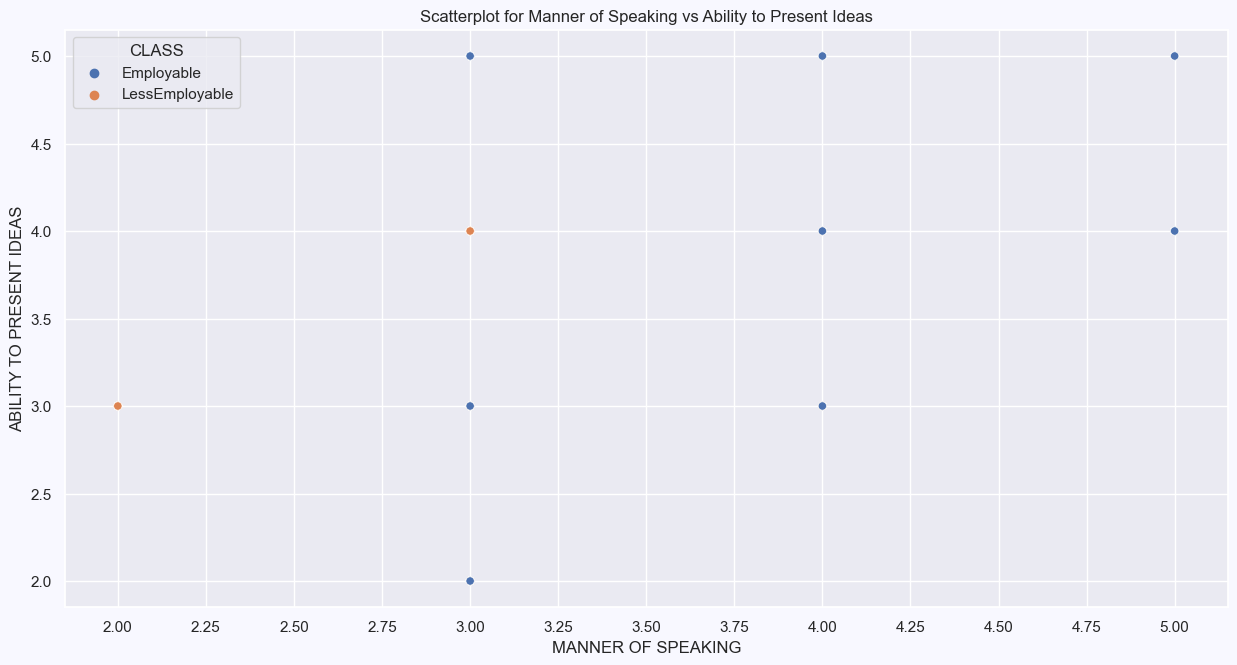

In [22]:
fig = plt.figure(figsize=(15,7.5))
fig.patch.set_facecolor('ghostwhite')

sns.set_theme(style = 'darkgrid', palette = 'deep')
sns.scatterplot(
    x = 'MANNER OF SPEAKING',
    y = 'ABILITY TO PRESENT IDEAS',
    hue = 'CLASS',
    data = df
)

plt.xticks(np.arange(2,5.25,0.25))
plt.title('Scatterplot for Manner of Speaking vs Ability to Present Ideas')
plt.show()

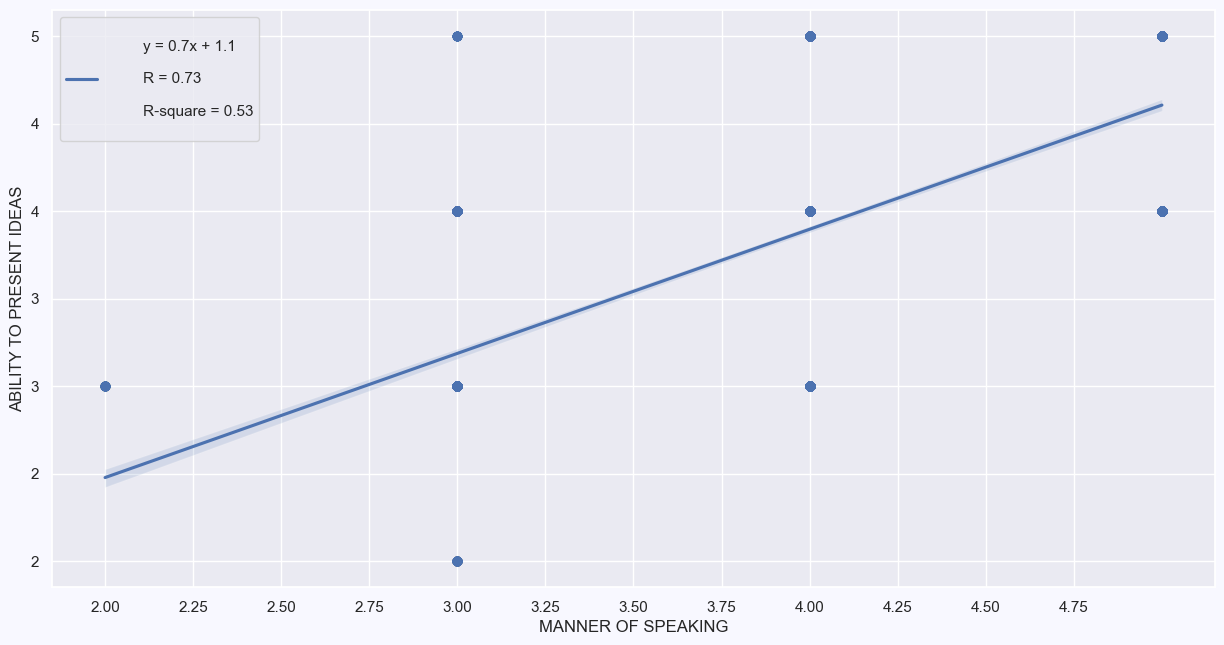

In [23]:
from scipy import stats
import math

fig = plt.figure(figsize=(15,7.5))
fig.patch.set_facecolor('ghostwhite')

x_data = df['MANNER OF SPEAKING']
y_data = df['ABILITY TO PRESENT IDEAS']

slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, y_data)

ax = sns.regplot(
    data = new_df,
    x = 'MANNER OF SPEAKING',
    y = 'ABILITY TO PRESENT IDEAS',
    color = 'b',
    line_kws = {
    'label':"""
        y = {0:.1f}x + {1:.1f}

        R = {2:.2f}

        R-square = {3:.2f}
    """.format(slope,
               intercept,
               r_value, 
               math.pow(r_value,2)
        )
    }
)

ax.legend()
sns.move_legend(ax, "upper left", bbox_to_anchor=(0, 1))

ax.get_yaxis().set_major_formatter(
    FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(np.arange(2,5,0.25))
plt.show()

Based on the Given Dataset, We can try create a Random Forest Model to predict if someone is employable or less employable

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

def stratified_sampling(df):
    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
    
    for itrain, itest in sss.split(df, df[['CLASS']]):
        df_train = df.loc[itrain]
        df_test = df.loc[itest]
        
    return [df_train, df_test]

In [25]:
strat_arr = stratified_sampling(df.drop('Name of Student',axis = 1))

strat_df_train = strat_arr[0]
strat_df_test = strat_arr[1]

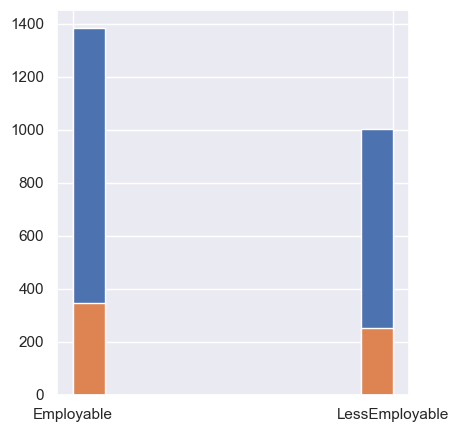

In [26]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)

strat_df_train['CLASS'].hist()

plt.subplot(1,2,1)

strat_df_test['CLASS'].hist()

plt.show()

In [27]:
X_train = strat_df_train.drop('CLASS', axis = 1)
y_train = strat_df_train['CLASS']

In [28]:
X_test = strat_df_test.drop('CLASS', axis = 1)
y_test = strat_df_test['CLASS']

In [29]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2385, 8), (2385,), (597, 8), (597,))

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

clf = RandomForestClassifier()

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
param_grid = { 
    'n_estimators': [10, 50, 100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'], 
    'max_depth': [4, 5, 6, 7, 8, 9, 10], 
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    clf, 
    param_grid,
    cv= 10,
    scoring = 'accuracy',
    return_train_score= True
)

In [33]:
clf_grid = grid_search.fit(X_train, y_train)

In [34]:
final_rfc = clf_grid.best_estimator_
final_rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [35]:
final_rfc.score(X_test, y_test)

0.8961474036850922

In [36]:
test_data1 = [3,4,5,3,4,3,5,5]

test_data2 = [4,4,4,4,5,5,5,5]

test_data3 = [5,5,5,5,3,4,5,5]

test_data4 = [5,3,4,3,4,3,3,4]


Testing using the test_data

In [37]:
def predict_scores(arr):
    
    categories = [
        'General Appearance',
        'Manner of Speaking',
        'Physical Condition',
        'Mental Alertness',
        'Self-Confidence',
        'Ability to Present Ideas',
        'Communication Skills',
        'Student Performance Rating'
    ]
    
    for i,score in enumerate(arr):
        print(f'   - {categories[i]} : {score}')
        
    print(f'\nMEAN:\n   - {sum(arr)/len(arr)}')
    
    prediction = final_rfc.predict([arr])  
    print(f'\nPREDICTION : {prediction}')

In [38]:
print('TEST DATA 1\n')
predict_scores(test_data1)

TEST DATA 1

   - General Appearance : 3
   - Manner of Speaking : 4
   - Physical Condition : 5
   - Mental Alertness : 3
   - Self-Confidence : 4
   - Ability to Present Ideas : 3
   - Communication Skills : 5
   - Student Performance Rating : 5

MEAN:
   - 4.0

PREDICTION : ['LessEmployable']


c:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [39]:
print('TEST DATA 2\n')
predict_scores(test_data2)

TEST DATA 2

   - General Appearance : 4
   - Manner of Speaking : 4
   - Physical Condition : 4
   - Mental Alertness : 4
   - Self-Confidence : 5
   - Ability to Present Ideas : 5
   - Communication Skills : 5
   - Student Performance Rating : 5

MEAN:
   - 4.5

PREDICTION : ['Employable']


c:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [40]:
print('TEST DATA 3\n')
predict_scores(test_data3)

TEST DATA 3

   - General Appearance : 5
   - Manner of Speaking : 5
   - Physical Condition : 5
   - Mental Alertness : 5
   - Self-Confidence : 3
   - Ability to Present Ideas : 4
   - Communication Skills : 5
   - Student Performance Rating : 5

MEAN:
   - 4.625

PREDICTION : ['Employable']


c:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [41]:
print('TEST DATA 4\n')
predict_scores(test_data4)

TEST DATA 4

   - General Appearance : 5
   - Manner of Speaking : 3
   - Physical Condition : 4
   - Mental Alertness : 3
   - Self-Confidence : 4
   - Ability to Present Ideas : 3
   - Communication Skills : 3
   - Student Performance Rating : 4

MEAN:
   - 3.625

PREDICTION : ['LessEmployable']


c:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [42]:
import joblib

In [50]:
ref_cols = list(X_train.columns)

joblib.dump(value = [final_rfc, ref_cols], filename = "rfc_student_classifier.pkl")

['rfc_student_classifier.pkl']

In [49]:
joblib.dump(final_rfc, filename = "rfc_student_classifier.cls")

['rfc_student_classifier.cls']